In [132]:
import torch
import sklearn
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
import tqdm as notebook_tqdm
import matplotlib.pyplot as plt

NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

X_blob, y_blob = make_blobs(n_samples=1000, 
                            n_features=NUM_FEATURES, 
                            centers=NUM_CLASSES, 
                            cluster_std=1.5, 
                            random_state=RANDOM_SEED)


X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.long)

X_train, X_test, y_train, y_test = train_test_split(X_blob, y_blob, test_size=0.2)

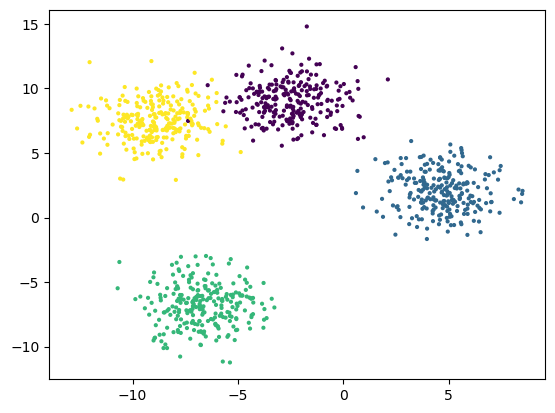

In [133]:
plt.scatter(x=X_blob[:, 0], y=X_blob[:, 1], c=y_blob, s=4, label="Training data")

In [137]:
X_train.shape, y_train.shape, X_test.shape

(torch.Size([800, 2]), torch.Size([800]), torch.Size([200, 2]))

In [135]:
# Build a model
import torch
from torch import nn
import numpy as np


class MultiClassModelV0(nn.Module):
    def __init__(self, input_features, output_features, hidden_units=8):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_features)
        )
    def forward(self, x):
        return self.layer_stack(x)
    
model_0 = MultiClassModelV0(input_features = 2, 
                            output_features = 4,
                            hidden_units = 8
                            )


def normalizePredictions(y_pred):
    vals = torch.softmax(y_pred, dim=1)
    return torch.argmax(vals, dim=1)


In [141]:
# Loss and optimizer
loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(params = model_0.parameters(), lr=0.1)

In [140]:
from helpers import calculate_accuracy

model_0.eval()
with torch.inference_mode():
    # get prediction
    y_preds = model_0(X_test)
    y_preds_v = normalizePredictions(y_preds)
    
# print(y_preds_v[:10], y_train[:10])
# print(calculate_accuracy(y_test, y_preds_v))
y_preds[:5], y_train[:5]    

(tensor([[-0.1800, -1.1249, -0.7897, -0.1932],
         [ 0.2528, -0.2379,  0.1882, -0.0066],
         [-0.1171, -0.9868, -0.6426, -0.1504],
         [-0.1752, -1.1082, -0.7936, -0.2050],
         [-0.6470, -0.6308, -1.2869, -0.9016]]),
 tensor([0, 0, 1, 0, 1]))

In [118]:
# Training loop
torch.manual_seed(42)

epochs = 1000

train_epochs = []
train_loss_arr = []
test_loss_arr = []

for epoch in range(epochs):
    
    model_0.train();
    
    y_logits_train = model_0(X_train)
    
    y_pred_train = normalizePredictions(y_logits_train)
    
    train_acc = calculate_accuracy(y_train, y_pred_train)
    
    loss = loss_fn(y_logits_train, y_train)
    
    optimizer.zero_grad()
    
    loss.backward()
    
    optimizer.step()
    
    model_0.eval()
    
    with torch.inference_mode():
        
        y_test_logits = model_0(X_test)
        
        y_test_preds = normalizePredictions(y_test_logits)
        
        test_acc = calculate_accuracy(y_test, y_test_preds)
        
        test_loss = loss_fn(y_test_logits, y_test)
        
        
        if epoch % 100 == 0 :
            train_epochs.append(epoch)
            
            train_loss_arr.append(loss.item())
            test_loss_arr.append(test_loss.item())
            
            print(f"Epoch: {epoch} | Train Loss: {loss:.5f} | Train Acc: {train_acc} | Test Loss: {test_loss:.5f} | Test Acc: {test_acc} ")
    
    

Epoch: 0 | Train Loss: 1.39092 | Train Acc: 47.75 | Test Loss: 1.11386 | Test Acc: 80.5 
Epoch: 100 | Train Loss: 0.04210 | Train Acc: 99.125 | Test Loss: 0.05415 | Test Acc: 98.5 
Epoch: 200 | Train Loss: 0.02812 | Train Acc: 99.125 | Test Loss: 0.03771 | Test Acc: 99.0 
Epoch: 300 | Train Loss: 0.02575 | Train Acc: 99.125 | Test Loss: 0.03412 | Test Acc: 99.0 
Epoch: 400 | Train Loss: 0.02469 | Train Acc: 99.125 | Test Loss: 0.03240 | Test Acc: 99.0 
Epoch: 500 | Train Loss: 0.02407 | Train Acc: 99.125 | Test Loss: 0.03118 | Test Acc: 99.0 
Epoch: 600 | Train Loss: 0.02362 | Train Acc: 99.25 | Test Loss: 0.03043 | Test Acc: 99.0 
Epoch: 700 | Train Loss: 0.02326 | Train Acc: 99.25 | Test Loss: 0.02987 | Test Acc: 99.0 
Epoch: 800 | Train Loss: 0.02294 | Train Acc: 99.25 | Test Loss: 0.02940 | Test Acc: 99.0 
Epoch: 900 | Train Loss: 0.02264 | Train Acc: 99.25 | Test Loss: 0.02898 | Test Acc: 99.0 


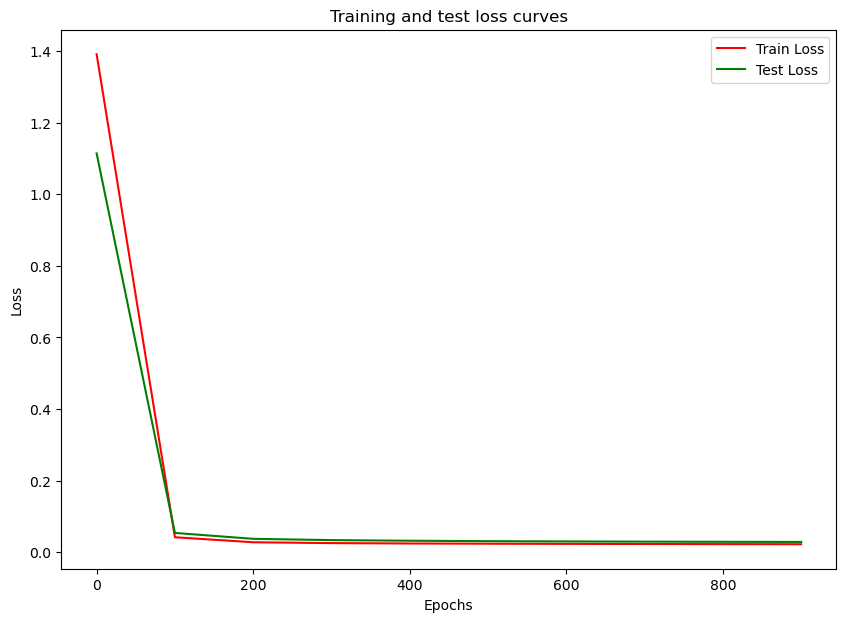

In [120]:
from helpers import plot_train_graph, plot_decision_boundary

plot_train_graph(x=train_epochs, y_train=train_loss_arr, y_test=test_loss_arr)

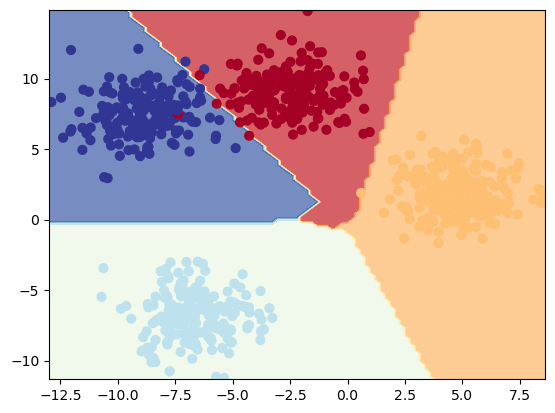

In [121]:
plot_decision_boundary(model_0, X_train, y_train)